# Trace Clustering in Process Mining

## Importing librarires

In [159]:
import pm4py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [160]:
from pm4py.objects.log.log import EventLog


## Importing log
Importing event log of RoadTraffic. It is in XES format with 51 traces.

In [161]:
# Importing a XES event log
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('DataSets/Repair.xes')
#log[1],type(log)

parsing log, completed traces :: 100%|██████████| 1104/1104 [00:00<00:00, 1479.87it/s]


## Petrinet from Heuristic miner on complete log

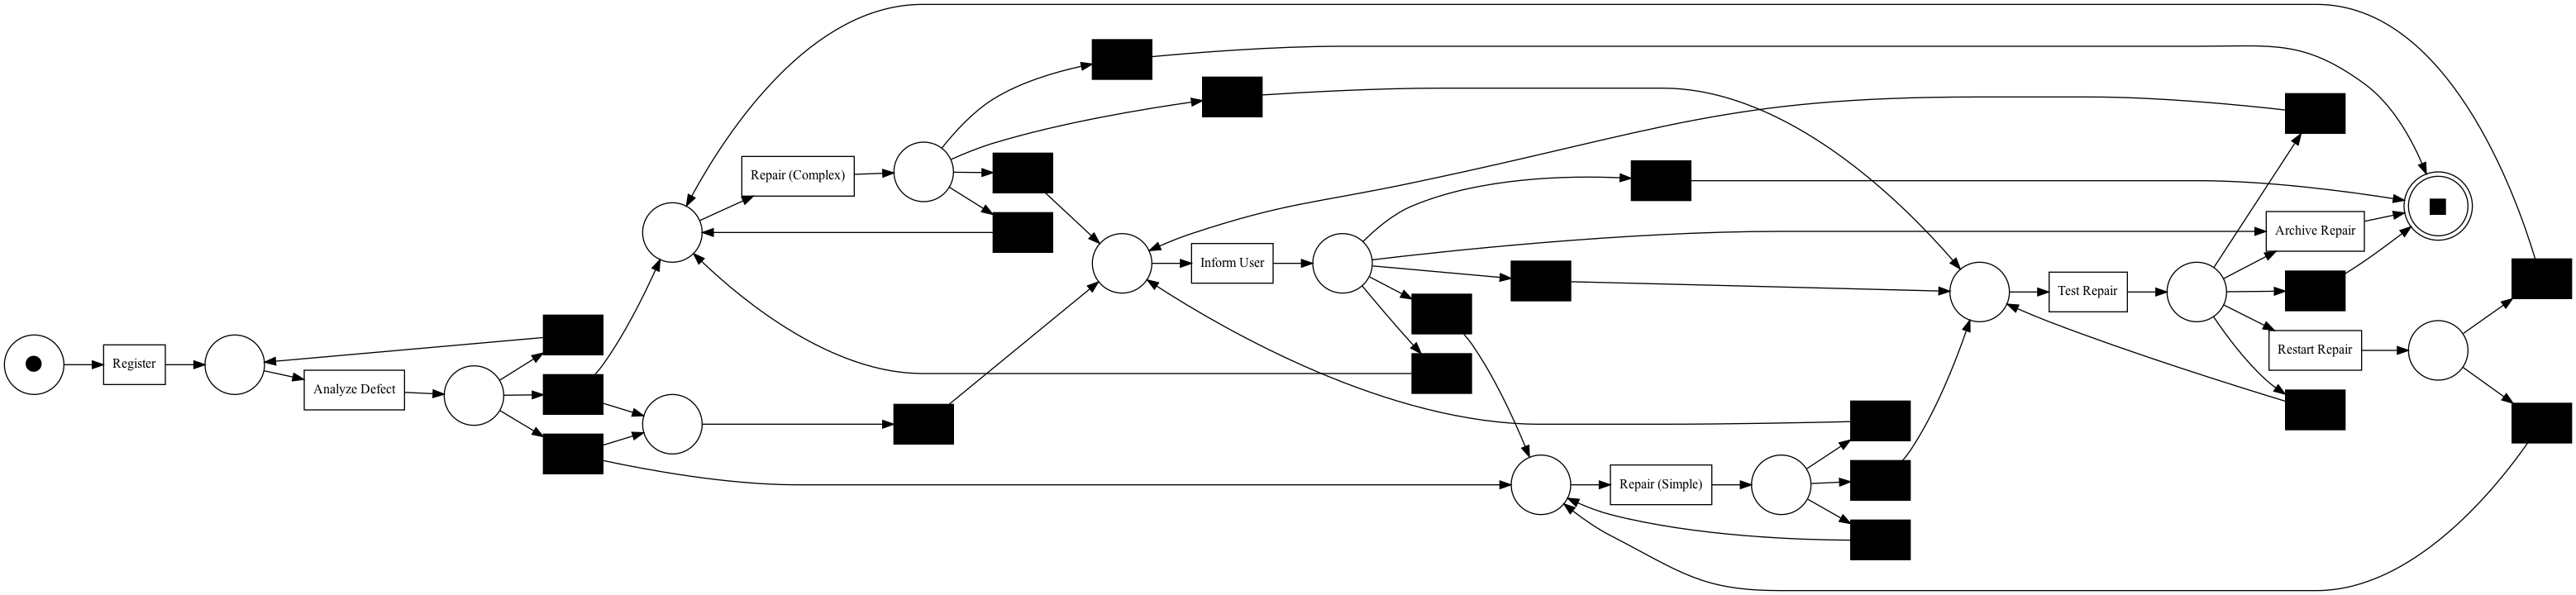

In [162]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net, im, fm = heuristics_miner.apply(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

## Log Fitness

In [163]:

from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
fitness = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
simp = simplicity_evaluator.apply(net)
#prec
#fitness, type(fitness)
print('Fitness of log is: ', fitness['log_fitness']*100,'%')
print('Precision of log is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 233/233 [00:00<00:00, 391.73it/s]

Fitness of log is:  95.02456549780716 %
Precision of log is:  48.68432789224868 %
Simplicity of Petrinet is:  55.26315789473685 %


### Extracting total Activities

In [164]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
resources = attributes_filter.get_attribute_values(log, "org:resource")
activities,resources

({'Register': 1104,
  'Analyze Defect': 2208,
  'Repair (Complex)': 1449,
  'Test Repair': 3016,
  'Inform User': 1102,
  'Archive Repair': 1000,
  'Repair (Simple)': 1570,
  'Restart Repair': 406},
 {'System': 3612,
  'Tester3': 910,
  'SolverC1': 534,
  'Tester2': 904,
  'SolverS1': 592,
  'Tester6': 876,
  'SolverS2': 498,
  'Tester4': 788,
  'Tester1': 902,
  'SolverS3': 480,
  'SolverC3': 401,
  'Tester5': 844,
  'SolverC2': 514})

### Converting activity keys in to a list

In [165]:
activities_array = activities.keys()
activities_array = list(activities_array)
activities_array


['Register',
 'Analyze Defect',
 'Repair (Complex)',
 'Test Repair',
 'Inform User',
 'Archive Repair',
 'Repair (Simple)',
 'Restart Repair']

### Getting activities of each Trace in a Dataframe

In [166]:
## Converting log in to a pandas dataframe
data = pd.read_csv('Datasets/Repair.csv')
#dataframe.to_csv('log.csv')
#dataframe
## Trace profiling on Activities
#data
dataframe =data[['Case ID','Activity']]
dataframe.head(10)

,Case ID,Activity
0,1,Register
1,1,Analyze Defect
2,1,Repair (Complex)
3,1,Test Repair
4,1,Inform User
5,1,Archive Repair
6,10,Register
7,10,Analyze Defect
8,10,Repair (Simple)
9,10,Test Repair


### Making np_array from Dataframe and grouping them on the basis of case identifier

In [167]:
np_arr = np.array(dataframe)
#np_arr
n = np.unique(np_arr[:,0])
events = np.array( [(np_arr[np_arr[:,0]==i,1]) for i in n] )
events

array([array(['Register', 'Analyze Defect', 'Repair (Complex)', 'Test Repair',
              'Inform User', 'Archive Repair'], dtype=object)                 ,
       array(['Register', 'Analyze Defect', 'Inform User', 'Repair (Complex)',
              'Test Repair', 'Archive Repair'], dtype=object)                 ,
       array(['Register', 'Analyze Defect', 'Repair (Simple)', 'Inform User',
              'Test Repair', 'Archive Repair'], dtype=object)                ,
       ...,
       array(['Register', 'Analyze Defect', 'Repair (Complex)', 'Test Repair',
              'Inform User', 'Restart Repair', 'Repair (Complex)', 'Test Repair'],
             dtype=object)                                                        ,
       array(['Register', 'Analyze Defect', 'Inform User', 'Repair (Simple)',
              'Test Repair', 'Restart Repair', 'Repair (Simple)', 'Test Repair'],
             dtype=object)                                                       ,
       array(['Register'

## 2d Vector of Number of CASES X Number of Activities

In [168]:
length  = len(log)
width = len(activities)
length,width
vectors  = [ [0] * width for _ in range(length)]
type(vectors),len(vectors)
vectors

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 

## Activities Profiling - Updating Vector with the count of occurence of Activities

In [169]:
for i in range(len(events)):
        for j in range(len(events[i])):
                if events[i][j] == activities_array[0]:
                    vectors[i][0] += 1
                elif events[i][j] == activities_array[1]:
                    vectors[i][1] += 1
                elif events[i][j] == activities_array[2]:
                    vectors[i][2] += 1
                elif events[i][j] == activities_array[3]:
                    vectors[i][3] += 1
                elif events[i][j] == activities_array[4]:
                    vectors[i][4] += 1
                elif events[i][j] == activities_array[5]:
                    vectors[i][5] += 1
                elif events[i][j] == activities_array[6]:
                    vectors[i][6] += 1
                elif events[i][j] == activities_array[7]:
                    vectors[i][7] += 1
                

### Making ND-Array of the Activity Vector

In [170]:
np_vectors = np.array(vectors)
np_vectors

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 2, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 2, 1],
       [1, 1, 0, ..., 0, 3, 2]])

## Elbow Method to find optimal number of clusters

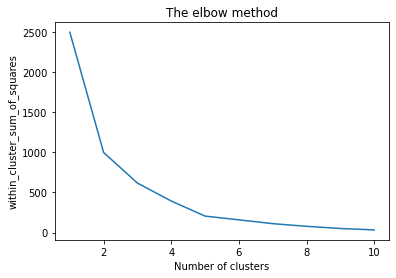

In [171]:
#  Elbow Method 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(np_vectors)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()

# KMeans - Euclidean

In [172]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(np_vectors)
kmeans.labels_
clustered  = kmeans.predict(np_vectors)
clustered


array([0, 0, 2, ..., 0, 1, 1], dtype=int32)

## Array of Sizes of clustered Data

In [173]:
count_arr = np.bincount(clustered)
print(count_arr)


[649 213 242]


## Creating Sub Event Logs based on Clustering Output

In [174]:
length1  = count_arr[0]
length2 = count_arr[1]
length3 = count_arr[2]

sub_log1 = EventLog()
sub_log2 = EventLog()
sub_log3 = EventLog()

for i in range(len(clustered)):
    if clustered[i] == 0:
        sub_log1.append(log[i])
    
    elif clustered[i] == 1:
        sub_log2.append(log[i])
        
    elif clustered[i] == 2: 
        sub_log3.append(log[i])

# Petrinets from Alpha miner on Sub Event Logs

## Petrinets from Heuristic miner on Sub Event Log1

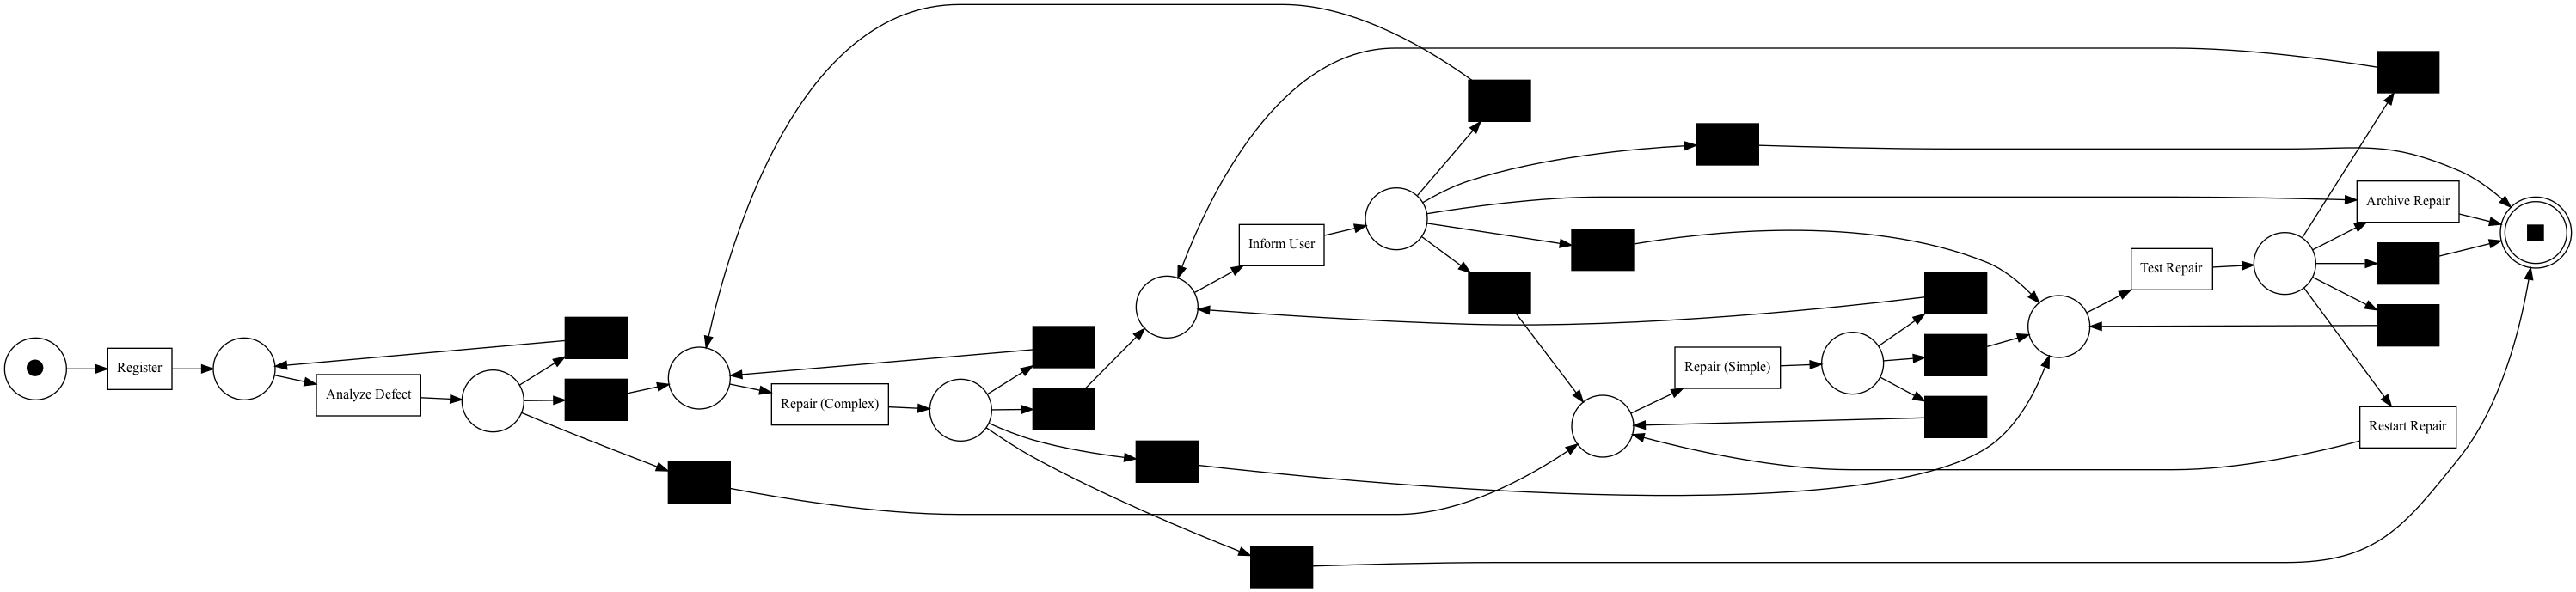

In [175]:

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net, im, fm = heuristics_miner.apply(sub_log1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [176]:

fitness = replay_fitness_evaluator.apply(sub_log1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 206/206 [00:00<00:00, 631.86it/s]

Fitness of Petrinet is:  96.26682102842608 %
Precision of Petrinet is:  52.58348451253107 %
Simplicity of Petrinet is:  56.923076923076934 %


## Petrinets from Alpha miner on Sub Event Log2

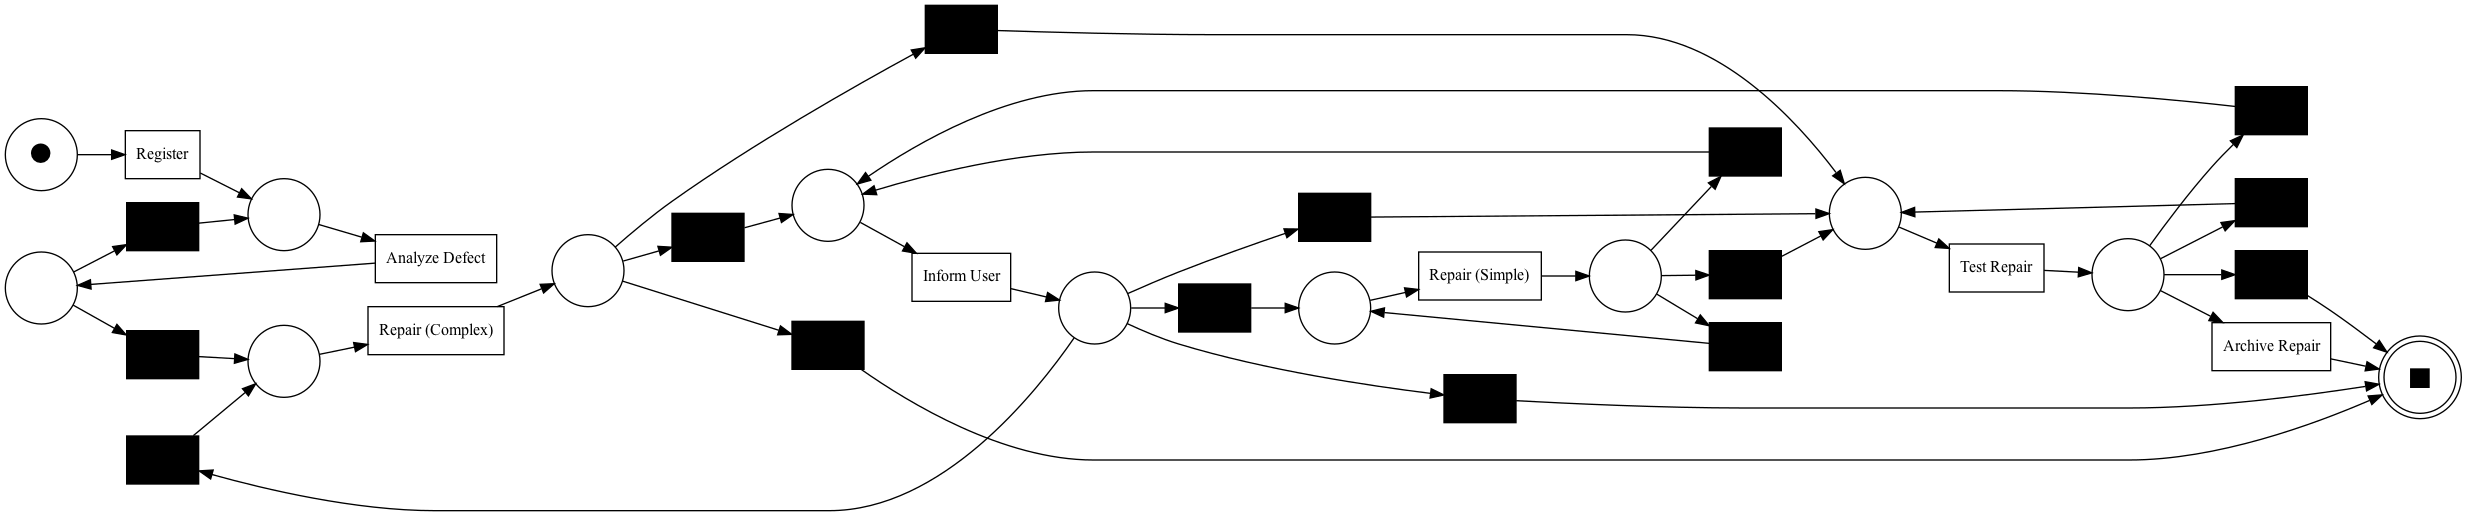

In [177]:

## Import the petrinet visualizer object
net, im, fm = heuristics_miner.apply(sub_log2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [178]:


fitness = replay_fitness_evaluator.apply(sub_log2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 173/173 [00:00<00:00, 1062.76it/s]

Fitness of Petrinet is:  93.47596407818278 %
Precision of Petrinet is:  55.58646267964767 %
Simplicity of Petrinet is:  62.962962962962955 %


## Petrinets from Alpha miner on Sub Event Log3

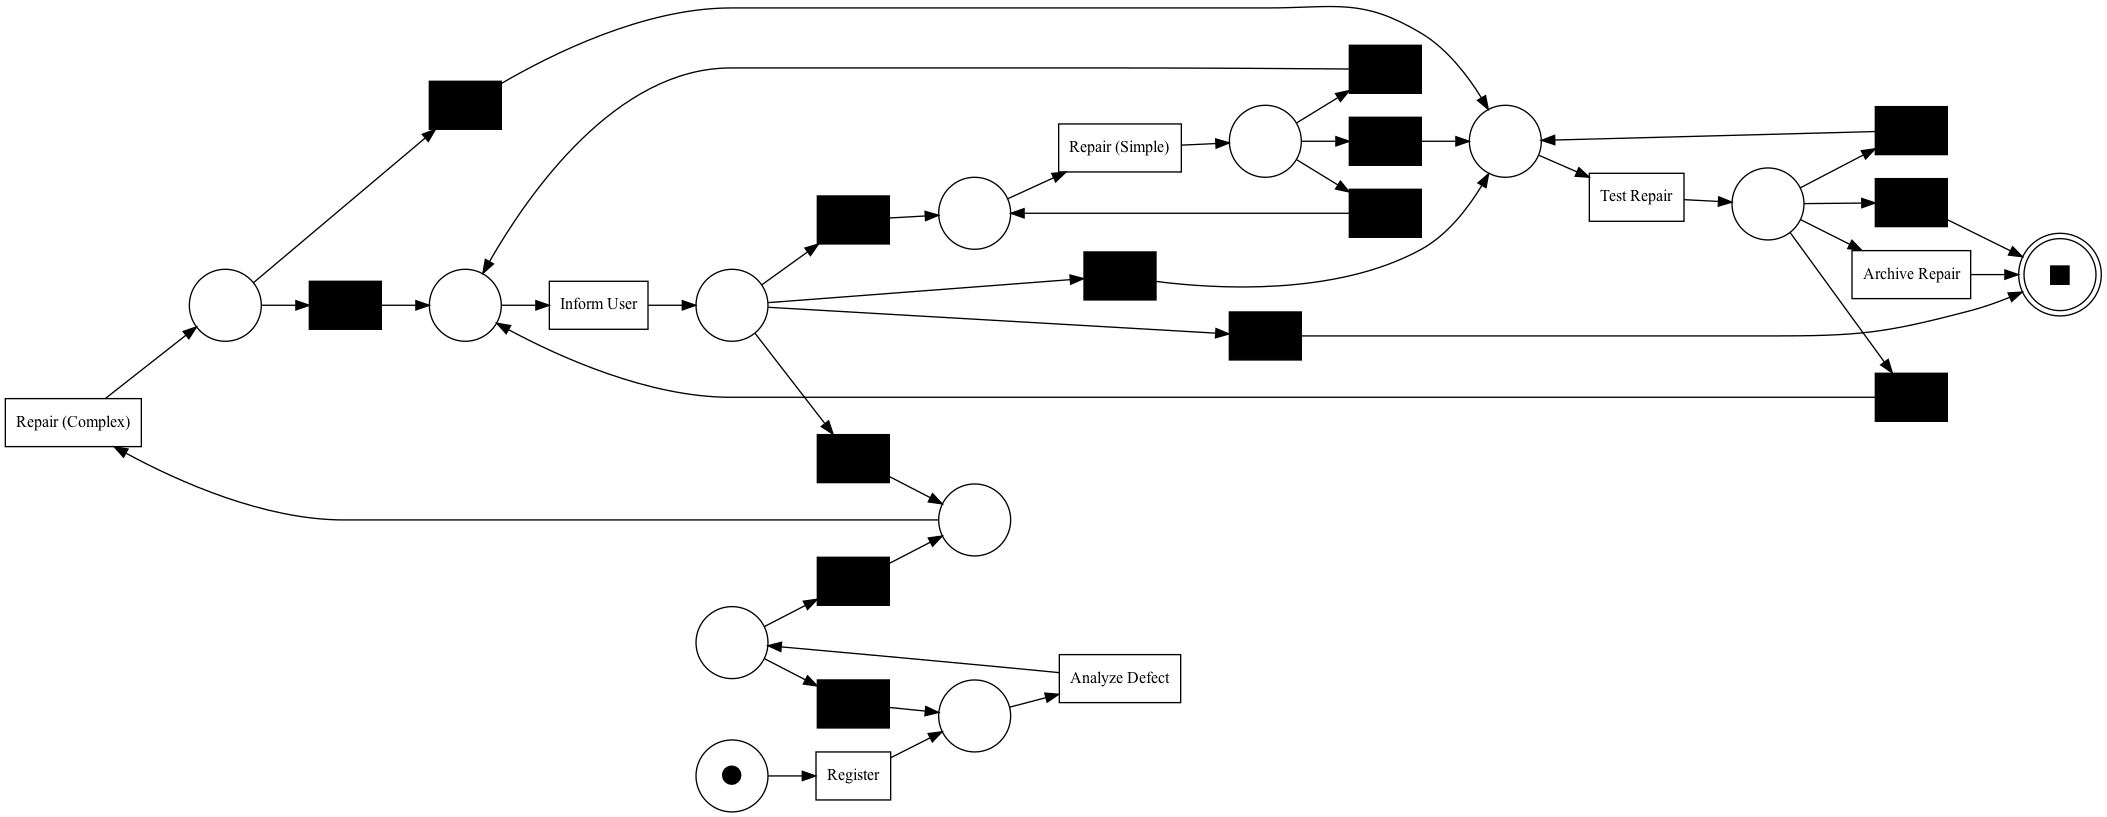

In [179]:

## Import the petrinet visualizer object
net, im, fm = heuristics_miner.apply(sub_log3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub event log

In [180]:

fitness = replay_fitness_evaluator.apply(sub_log3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 141/141 [00:00<00:00, 1119.97it/s]

Fitness of Petrinet is:  93.80261927034613 %
Precision of Petrinet is:  56.39709028669234 %
Simplicity of Petrinet is:  64.70588235294117 %


# DB SCAN

## Hamming Distance

In [181]:
from sklearn.cluster import DBSCAN
clustering_DB_Hamm = DBSCAN(eps=0.3, min_samples=1, metric ='hamming').fit(np_vectors)


clustering_DB_Hamm = clustering_DB_Hamm.fit_predict(np_vectors)
clustering_DB_Hamm
# clustered = clustering.labels_
# clustered


array([0, 0, 0, ..., 2, 2, 1])

### Size of Clusters

In [182]:
count_arr_DB1 = np.bincount(clustering_DB_Hamm)
print(count_arr_DB1)


[811 109 182   2]


## Creating Sub Event Logs based on Clustering Output

In [183]:
length1  = count_arr_DB1[0]
length2 = count_arr_DB1[1]
length3 = count_arr_DB1[2]
length4 = count_arr_DB1[3]

sub_log1_DB1 = EventLog()
sub_log2_DB1 = EventLog()
sub_log3_DB1 = EventLog()
sub_log4_DB1 = EventLog()

for i in range(len(clustering_DB_Hamm)):
    if clustering_DB_Hamm[i] == 0:
        sub_log1_DB1.append(log[i])
    
    elif clustering_DB_Hamm[i] == 1:
        sub_log2_DB1.append(log[i])
        
    elif clustering_DB_Hamm[i] == 2: 
        sub_log3_DB1.append(log[i])

    elif clustering_DB_Hamm[i] == 3: 
        sub_log4_DB1.append(log[i])

 

## Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Hamming Distance

### Petrinets from Alpha miner on Sub Event Log1

### Log Fitness and Precision of SubLog1

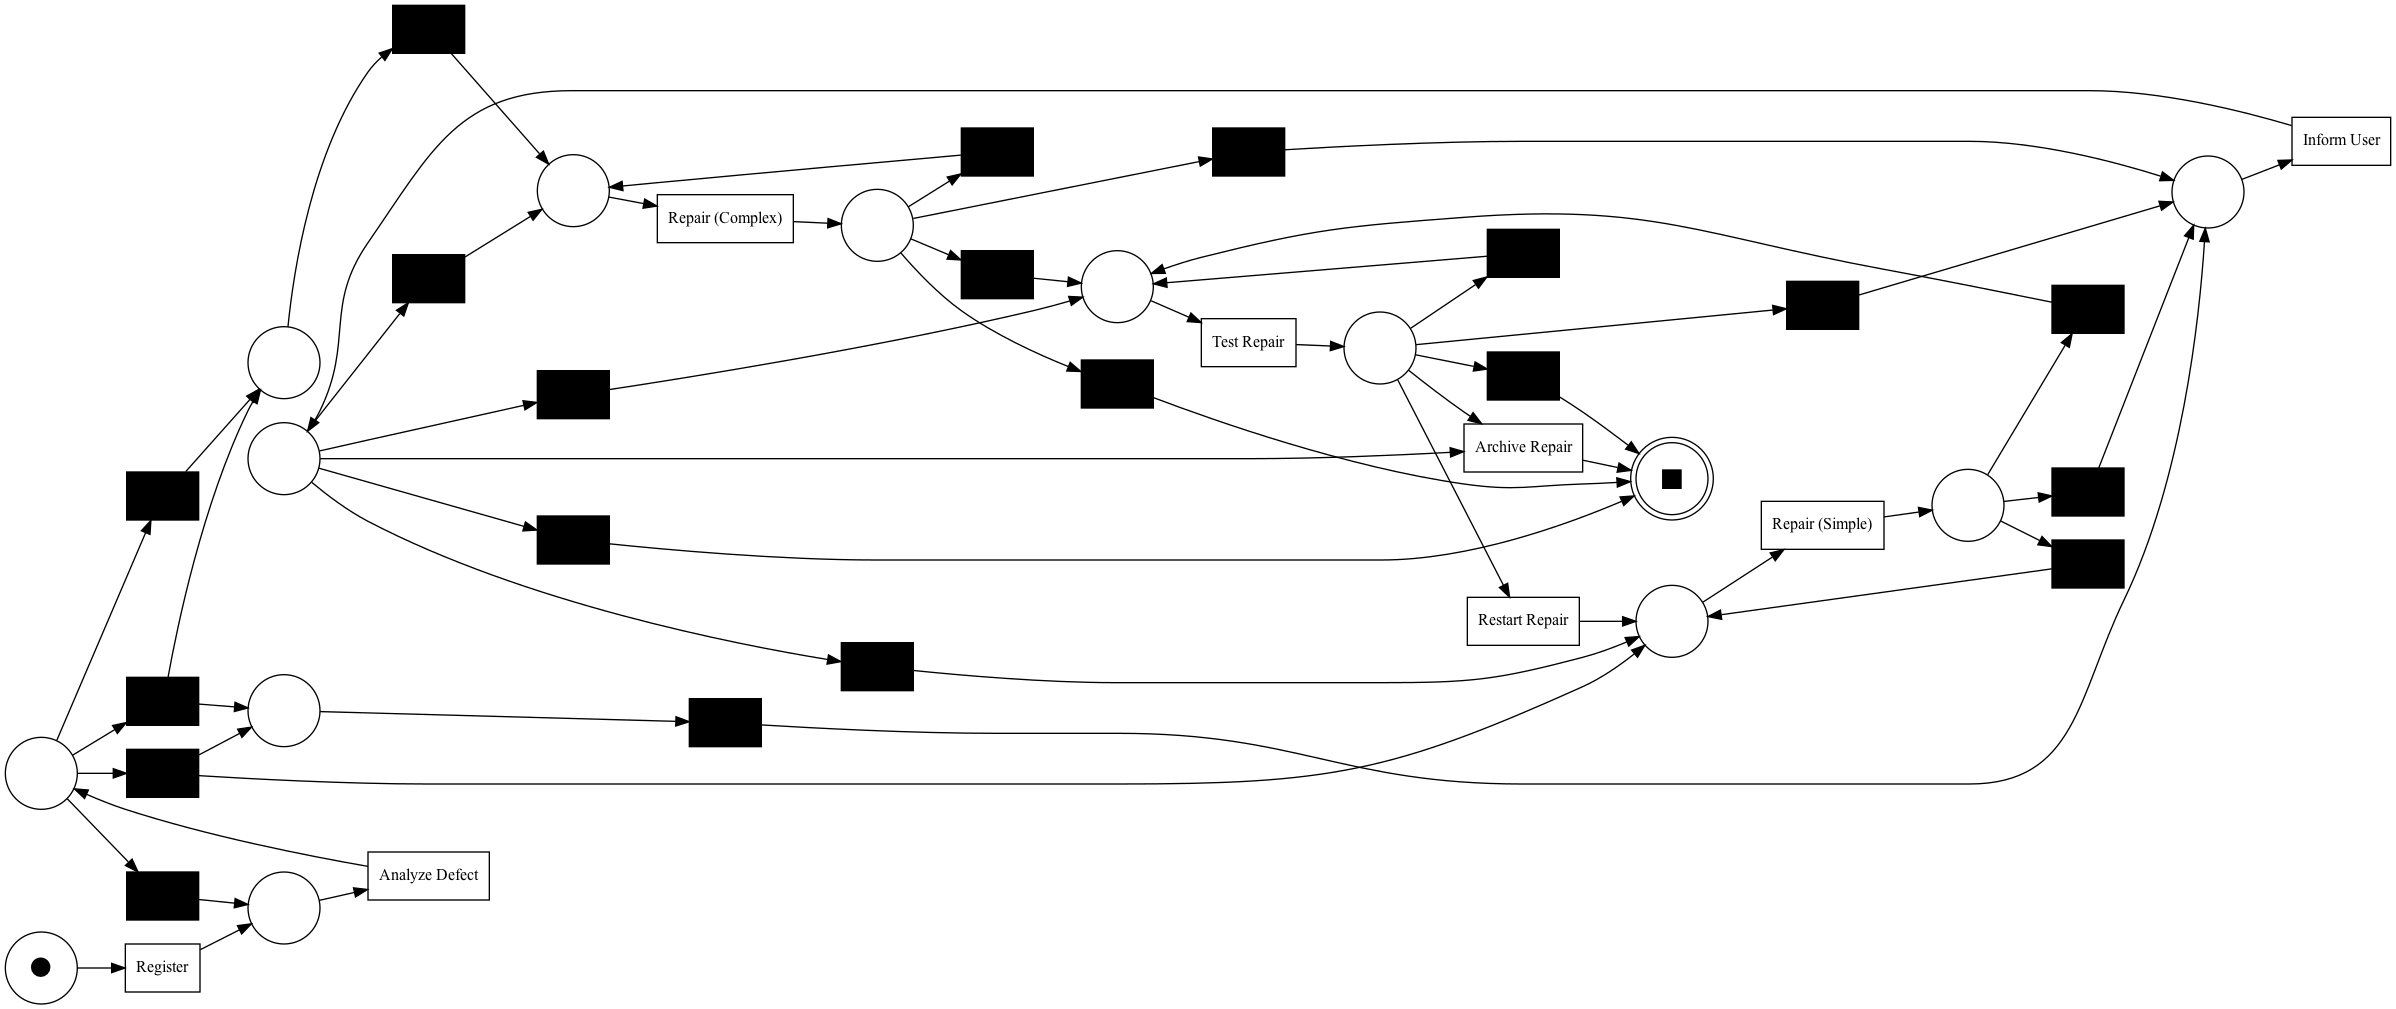

replaying log with TBR, completed variants :: 100%|██████████| 191/191 [00:00<00:00, 466.55it/s]

Fitness of Petrinet is:  95.83925311231957 %
Precision of Petrinet is:  49.09216074348163 %
Simplicity of Petrinet is:  55.26315789473685 %


In [184]:
net, im, fm = heuristics_miner.apply(sub_log1_DB1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log1_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

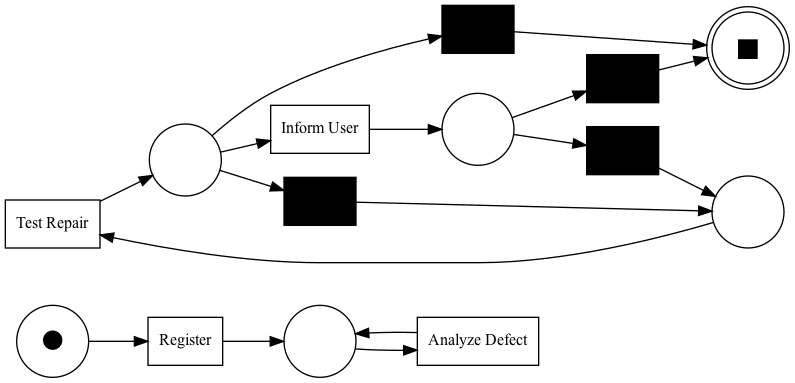

replaying log with TBR, completed variants :: 100%|██████████| 164/164 [00:00<00:00, 1759.66it/s]

Fitness of Petrinet is:  91.05824446267432 %
Precision of Petrinet is:  56.869565217391305 %
Simplicity of Petrinet is:  77.77777777777779 %


In [185]:
net, im, fm = heuristics_miner.apply(sub_log2_DB1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log2_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log3

### Log Fitness and Precision of Sub Event log 3

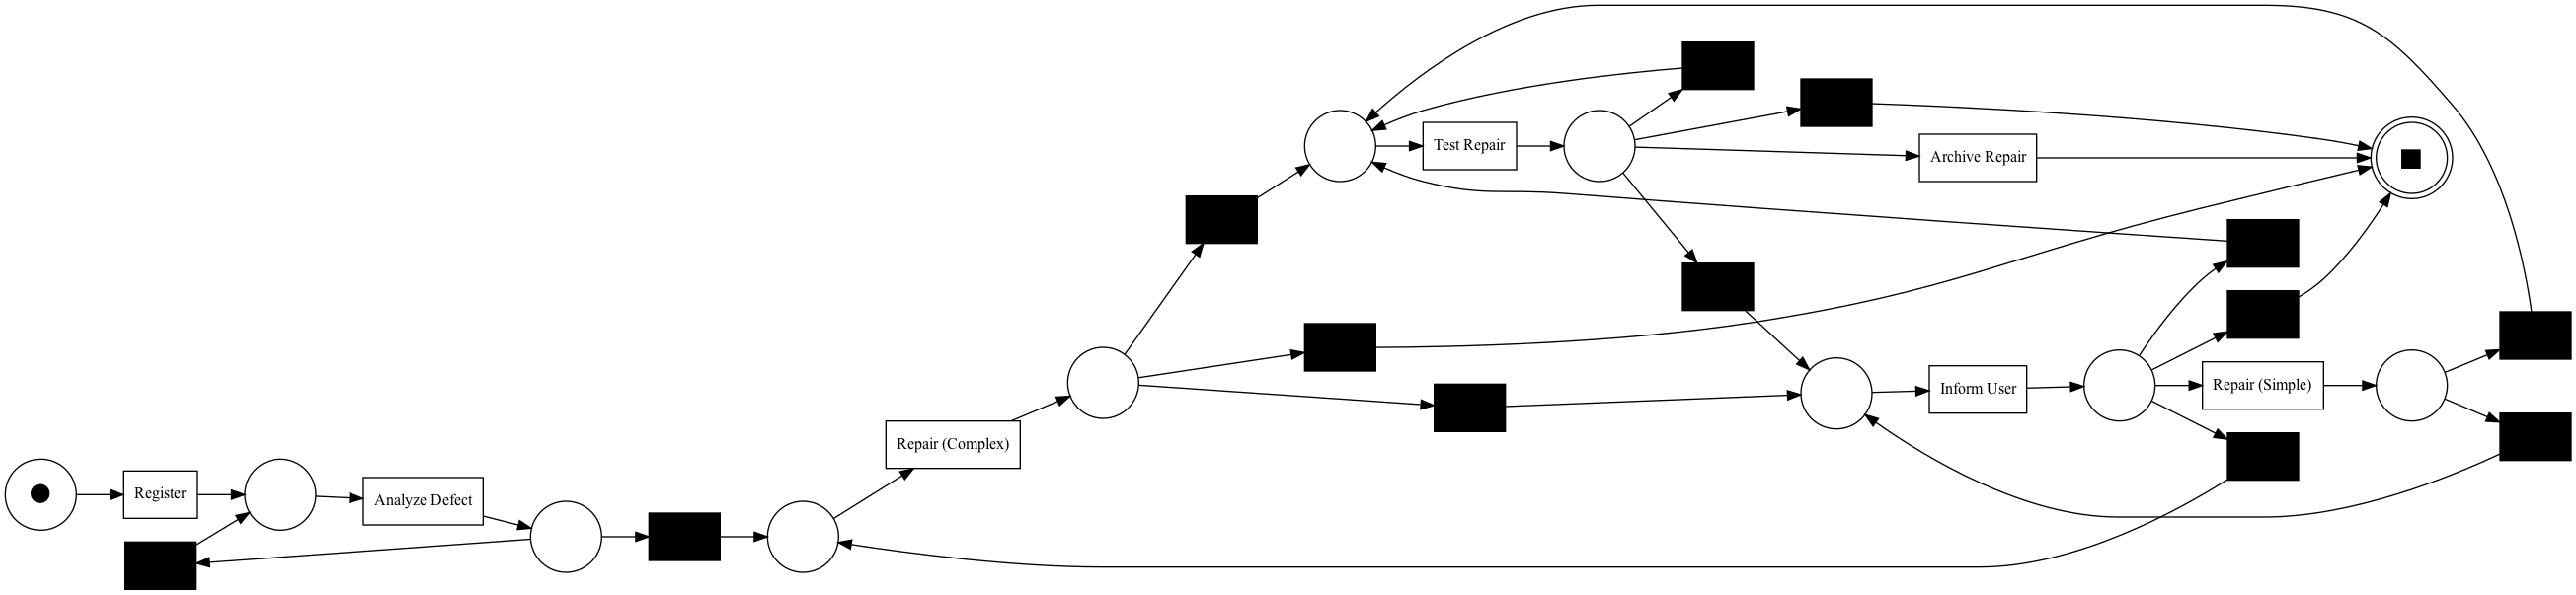

replaying log with TBR, completed variants :: 100%|██████████| 167/167 [00:00<00:00, 1169.83it/s]

Fitness of Petrinet is:  90.978886756238 %
Precision of Petrinet is:  55.436529191215854 %
Simplicity of Petrinet is:  63.26530612244898 %


In [186]:
net, im, fm = heuristics_miner.apply(sub_log3_DB1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log3_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# DB Scan 
## Euclidean Distance

In [187]:
from sklearn.cluster import DBSCAN
clustering_DB_Euclidean = DBSCAN(eps=1.5, min_samples=1, metric ='euclidean').fit(np_vectors)


clustering_DB_Euclidean = clustering_DB_Euclidean.fit_predict(np_vectors)
clustering_DB_Euclidean
# clustered = clustering.labels_
# clustered


array([0, 0, 0, ..., 2, 2, 3])

### Size of Clusters

In [188]:
count_arr_DB2 = np.bincount(clustering_DB_Euclidean)
print(count_arr_DB2)


[811  11 182  98   2]


## Creating Sub Event Logs based on Clustering Output

In [189]:
length1  = count_arr_DB2[0]
length2 = count_arr_DB2[1]
length3 = count_arr_DB2[2]
length4 = count_arr_DB2[3]
# length5 = count_arr_DB2[4]

sub_log1_DB2 = EventLog()
sub_log2_DB2 = EventLog()
sub_log3_DB2 = EventLog()
sub_log4_DB2 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_DB_Euclidean)):
    if clustering_DB_Euclidean[i] == 0:
        sub_log1_DB2.append(log[i])
    
    elif clustering_DB_Euclidean[i] == 1:
        sub_log2_DB2.append(log[i])
        
    elif clustering_DB_Euclidean[i] == 2: 
        sub_log3_DB2.append(log[i])
        
    elif clustering_DB_Euclidean[i] == 3: 
        sub_log4_DB2.append(log[i])


## Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

### Petrinets from Alpha miner on Sub Event Log1

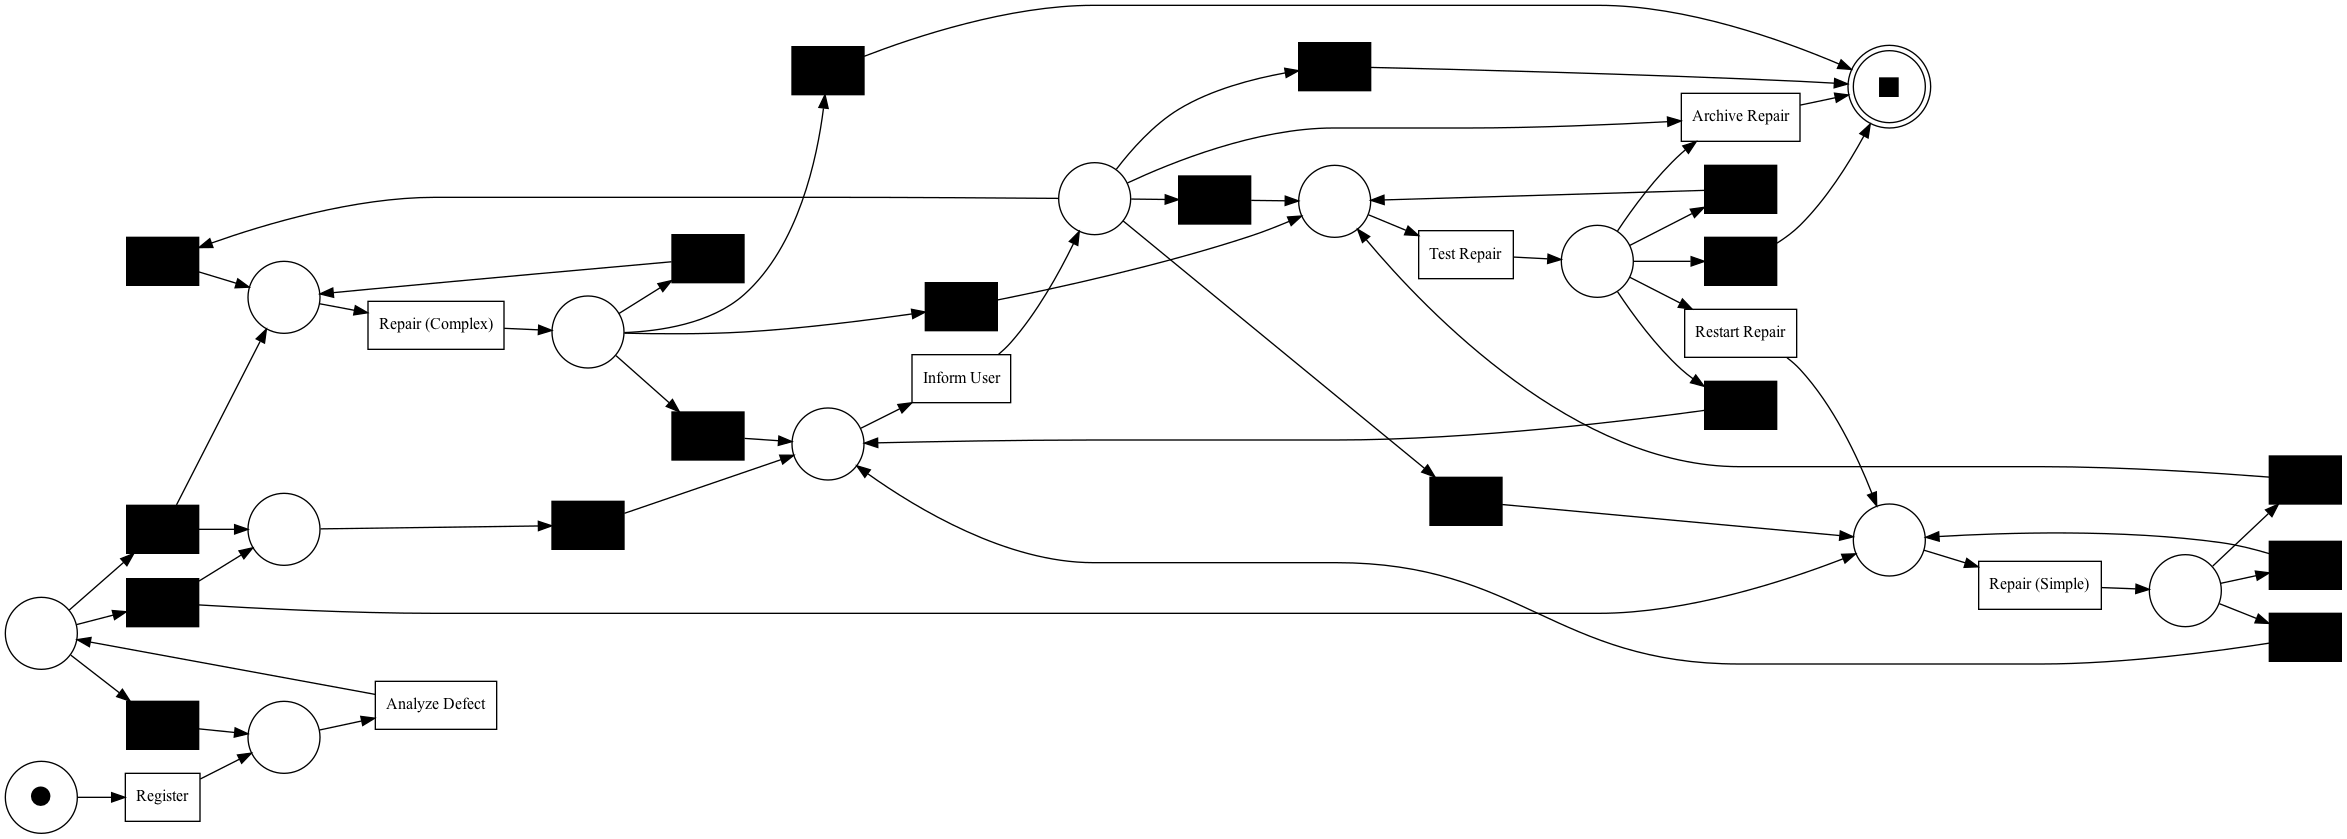

replaying log with TBR, completed variants :: 100%|██████████| 191/191 [00:00<00:00, 454.91it/s]

Fitness of Petrinet is:  94.59340345502835 %
Precision of Petrinet is:  48.28812052985738 %
Simplicity of Petrinet is:  54.92957746478873 %


In [190]:
net, im, fm = heuristics_miner.apply(sub_log1_DB2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log1_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log3

## Log Fitness and Precision of SubLog3

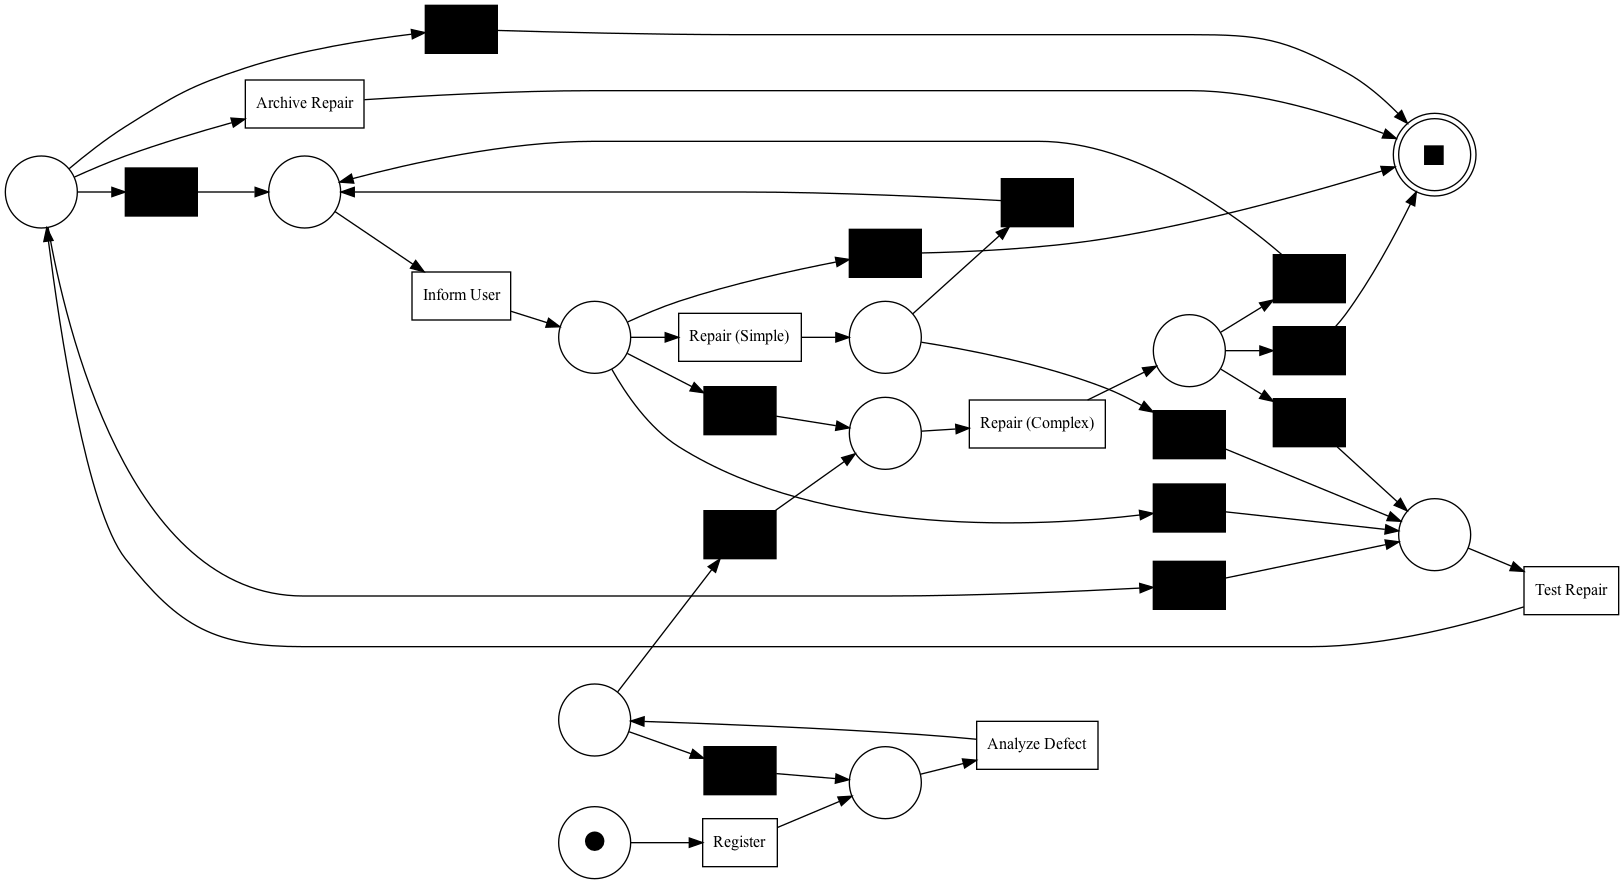

replaying log with TBR, completed variants :: 100%|██████████| 167/167 [00:00<00:00, 1224.73it/s]

Fitness of Petrinet is:  90.978886756238 %
Precision of Petrinet is:  55.436529191215854 %
Simplicity of Petrinet is:  63.26530612244898 %


In [191]:

net, im, fm = heuristics_miner.apply(sub_log3_DB2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log3_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log4

## Log Fitness and Precision of Sub Event log 4

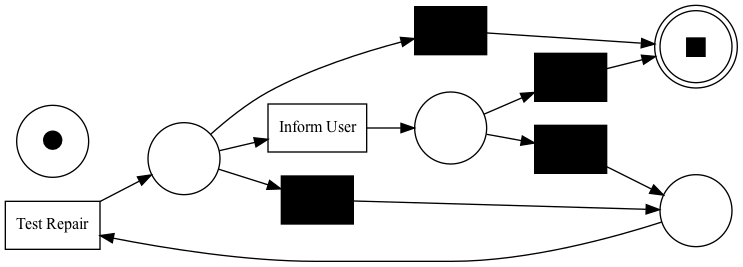

replaying log with TBR, completed variants :: 100%|██████████| 151/151 [00:00<00:00, 1563.08it/s]

Fitness of Petrinet is:  87.71929824561404 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  84.61538461538463 %


In [192]:
net, im, fm = heuristics_miner.apply(sub_log4_DB2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log4_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log4_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# DB Scan
## Jaccard  Distance

In [193]:
from sklearn.cluster import DBSCAN
clustering_DB_Jaccard = DBSCAN(eps=0.13, min_samples=5, metric ='jaccard').fit(np_vectors)
clustering_DB_Jaccard = clustering_DB_Jaccard.fit_predict(np_vectors)
clustering_DB_Jaccard
# clustered = clustering.labels_
# clustered

array([ 0,  0,  1, ..., -1,  5,  5])

In [194]:
# Removing Negative values by scaling by 1
for i in range(len(clustering_DB_Jaccard)):
    clustering_DB_Jaccard[i]=clustering_DB_Jaccard[i]+1

In [195]:
count_arr_DB3 = np.bincount(clustering_DB_Jaccard)
print(count_arr_DB3)


[  4 524 211 269  43  31  22]


## Creating Sub Event Logs based on Clustering Output

In [196]:
length1  = count_arr_DB3[0]
length2 = count_arr_DB3[1]
length3 = count_arr_DB3[2]
length4 = count_arr_DB3[3]
# length5 = count_arr_DB2[4]

sub_log1_DB3 = EventLog()
sub_log2_DB3 = EventLog()
sub_log3_DB3 = EventLog()
sub_log4_DB3 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_DB_Jaccard)):
    if clustering_DB_Jaccard[i] == 0:
        sub_log1_DB3.append(log[i])
    
    elif clustering_DB_Jaccard[i] == 1:
        sub_log2_DB3.append(log[i])
        
    elif clustering_DB_Jaccard[i] == 2: 
        sub_log3_DB3.append(log[i])
    elif clustering_DB_Jaccard[i] == 3: 
        sub_log4_DB3.append(log[i])


# Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Jaccard Distance

## Petrinets from Alpha miner on Sub Event Log1

## Log Fitness and Precision of SubLog1

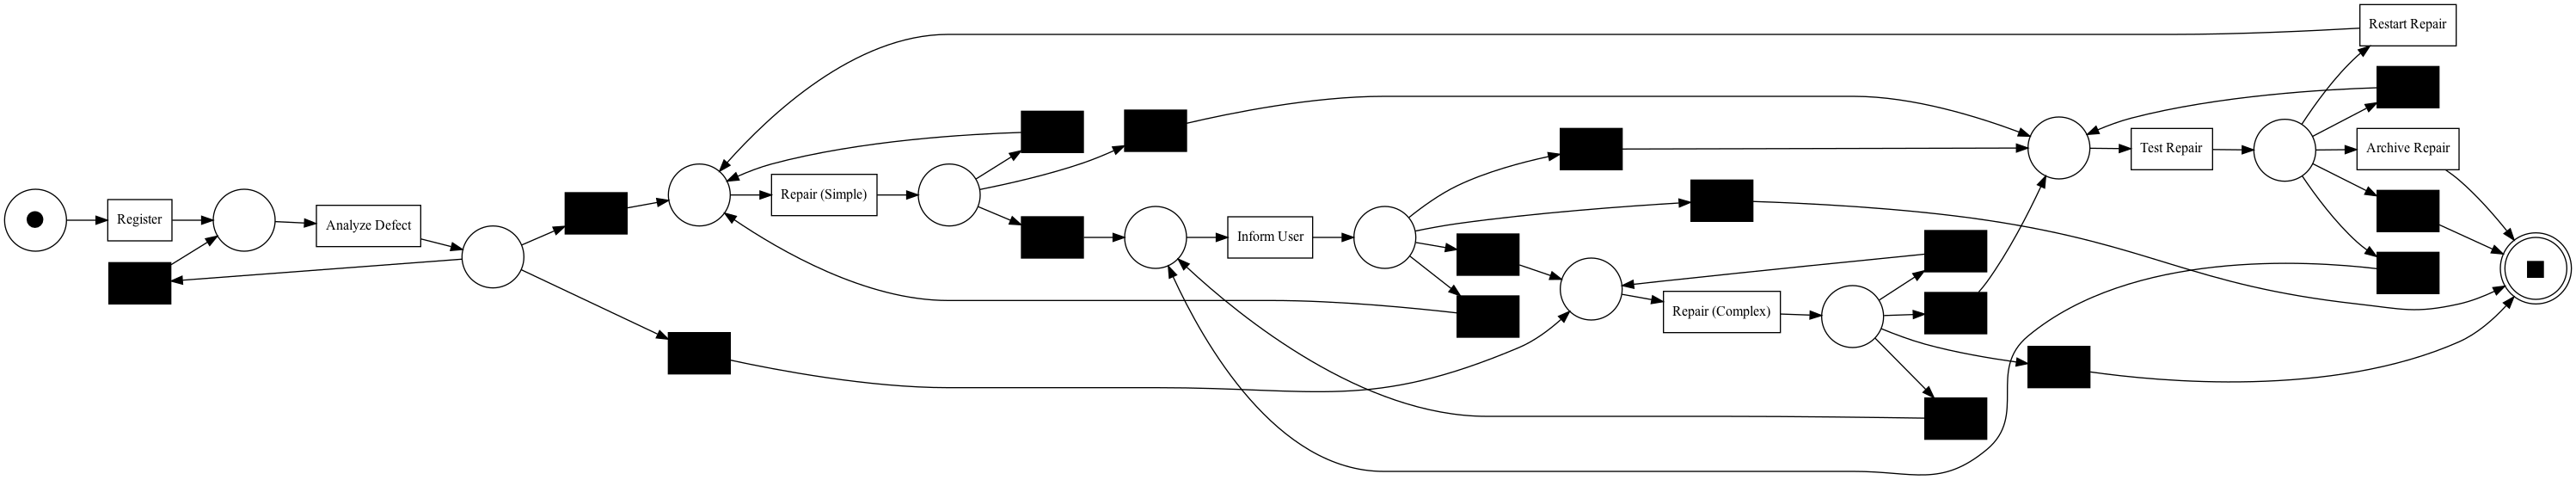

replaying log with TBR, completed variants :: 100%|██████████| 183/183 [00:00<00:00, 603.50it/s]

Fitness of Petrinet is:  97.7113213304852 %
Precision of Petrinet is:  50.8244861079738 %
Simplicity of Petrinet is:  58.730158730158735 %


In [197]:
net, im, fm = heuristics_miner.apply(sub_log2_DB3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log2_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

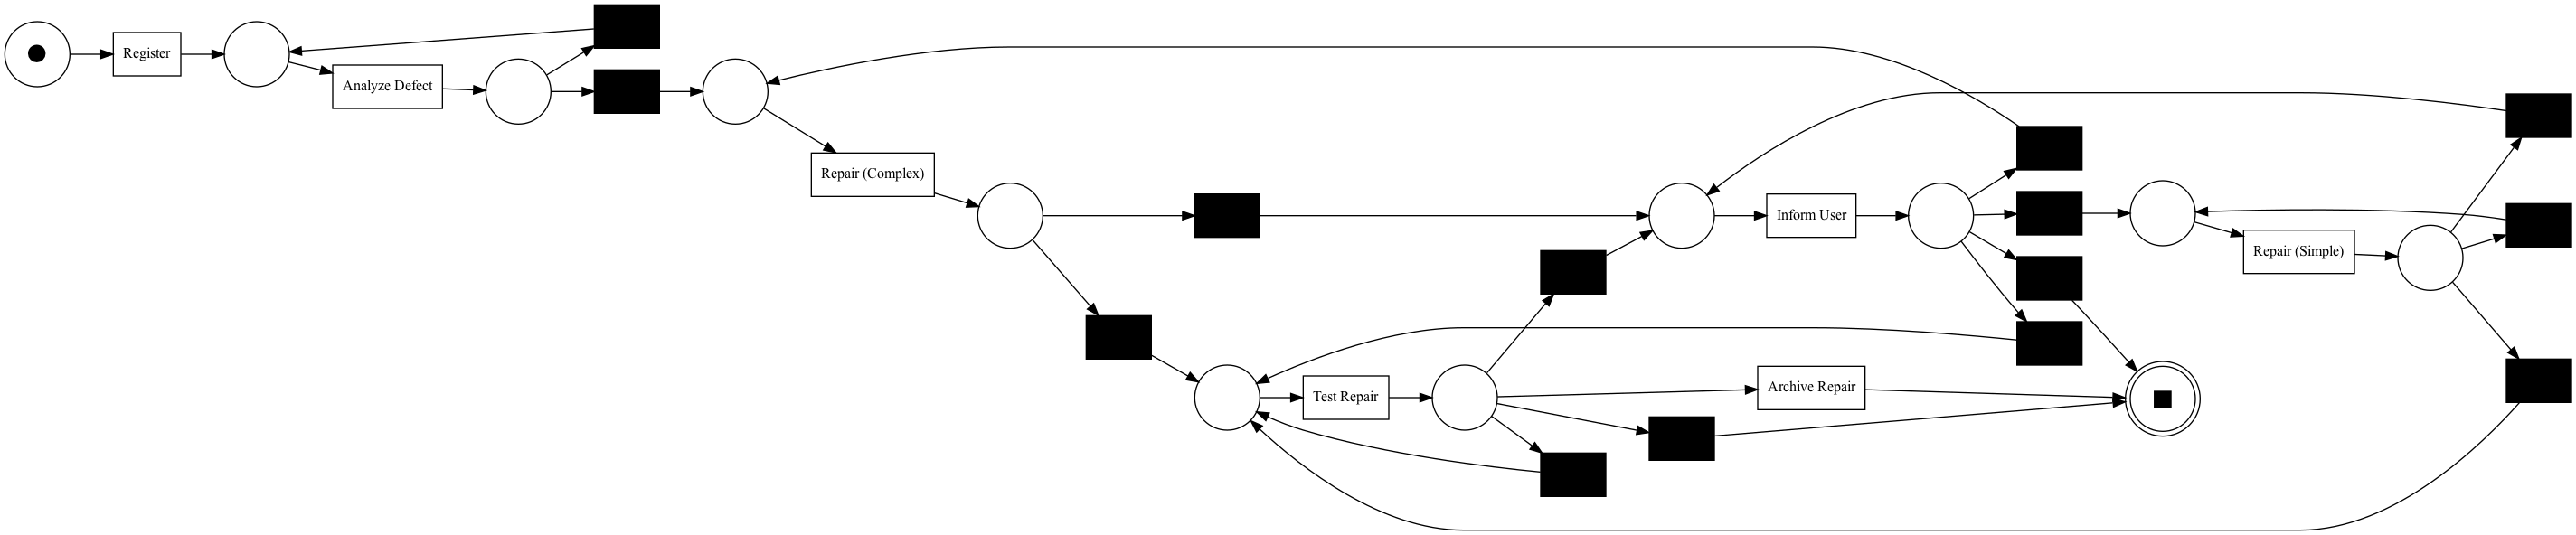

replaying log with TBR, completed variants :: 100%|██████████| 137/137 [00:00<00:00, 1218.85it/s]

Fitness of Petrinet is:  93.86552370747388 %
Precision of Petrinet is:  56.304985337243394 %
Simplicity of Petrinet is:  64.70588235294117 %


In [198]:
net, im, fm = heuristics_miner.apply(sub_log3_DB3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log3_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log3

## Log Fitness and Precision of Sub Event log 3

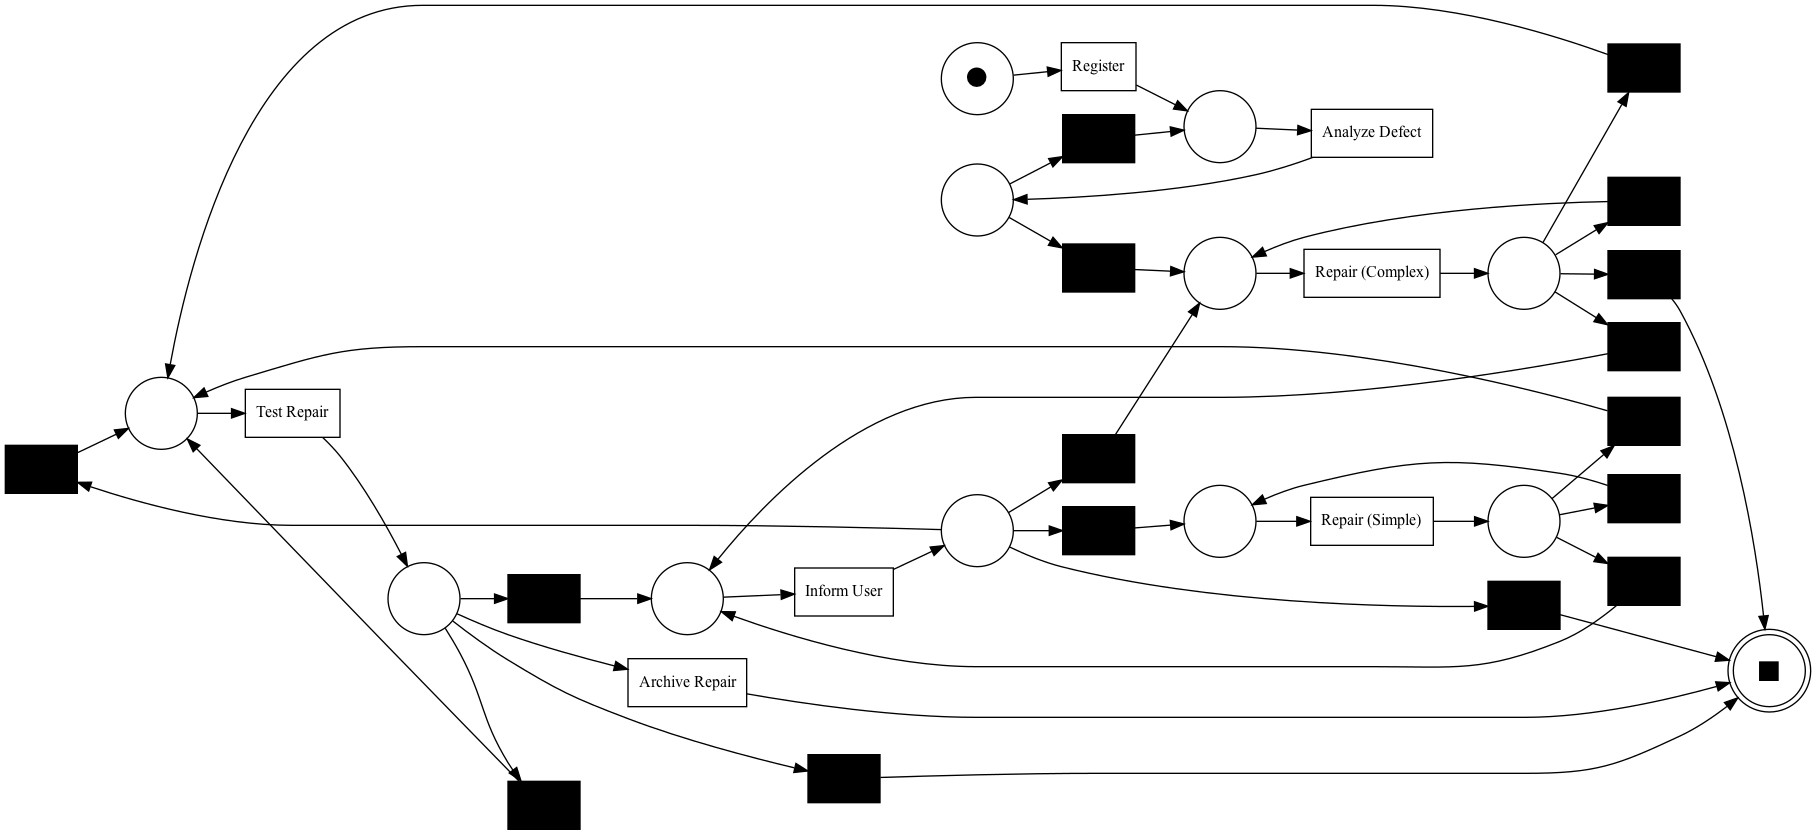

replaying log with TBR, completed variants :: 100%|██████████| 198/198 [00:00<00:00, 964.31it/s] 

Fitness of Petrinet is:  94.7080291970803 %
Precision of Petrinet is:  54.12095639943742 %
Simplicity of Petrinet is:  61.40350877192983 %


In [199]:
net, im, fm = heuristics_miner.apply(sub_log4_DB3, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log4_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log4_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# Agglomerative Clustering
## Euclidean

In [200]:

from sklearn.cluster import AgglomerativeClustering

clustering_Agglomerative = AgglomerativeClustering(n_clusters=3,affinity='euclidean').fit(np_vectors)
clustering_Agglomerative =clustering_Agglomerative.labels_
clustering_Agglomerative

array([0, 0, 2, ..., 0, 1, 1])

In [201]:
count_arr_Aglomerative = np.bincount(clustering_Agglomerative)
print(count_arr_Aglomerative)


[649 213 242]


## Creating Sub Event Logs based on Clustering Output

In [202]:
length1  = count_arr_Aglomerative[0]
length2 = count_arr_Aglomerative[1]
length3 = count_arr_Aglomerative[2]
# length4 = count_arr_DB2[3]
# length5 = count_arr_DB2[4]

sub_log1_AG = EventLog()
sub_log2_AG = EventLog()
sub_log3_AG = EventLog()
# sub_log4_DB2 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_Agglomerative)):
    if clustering_Agglomerative[i] == 0:
        sub_log1_AG.append(log[i])
    
    elif clustering_Agglomerative[i] == 1:
        sub_log2_AG.append(log[i])
        
    elif clustering_Agglomerative[i] == 2: 
        sub_log3_AG.append(log[i])


# Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

## Petrinets from Alpha miner on Sub Event Log1

## Log Fitness and Precision of SubLog1

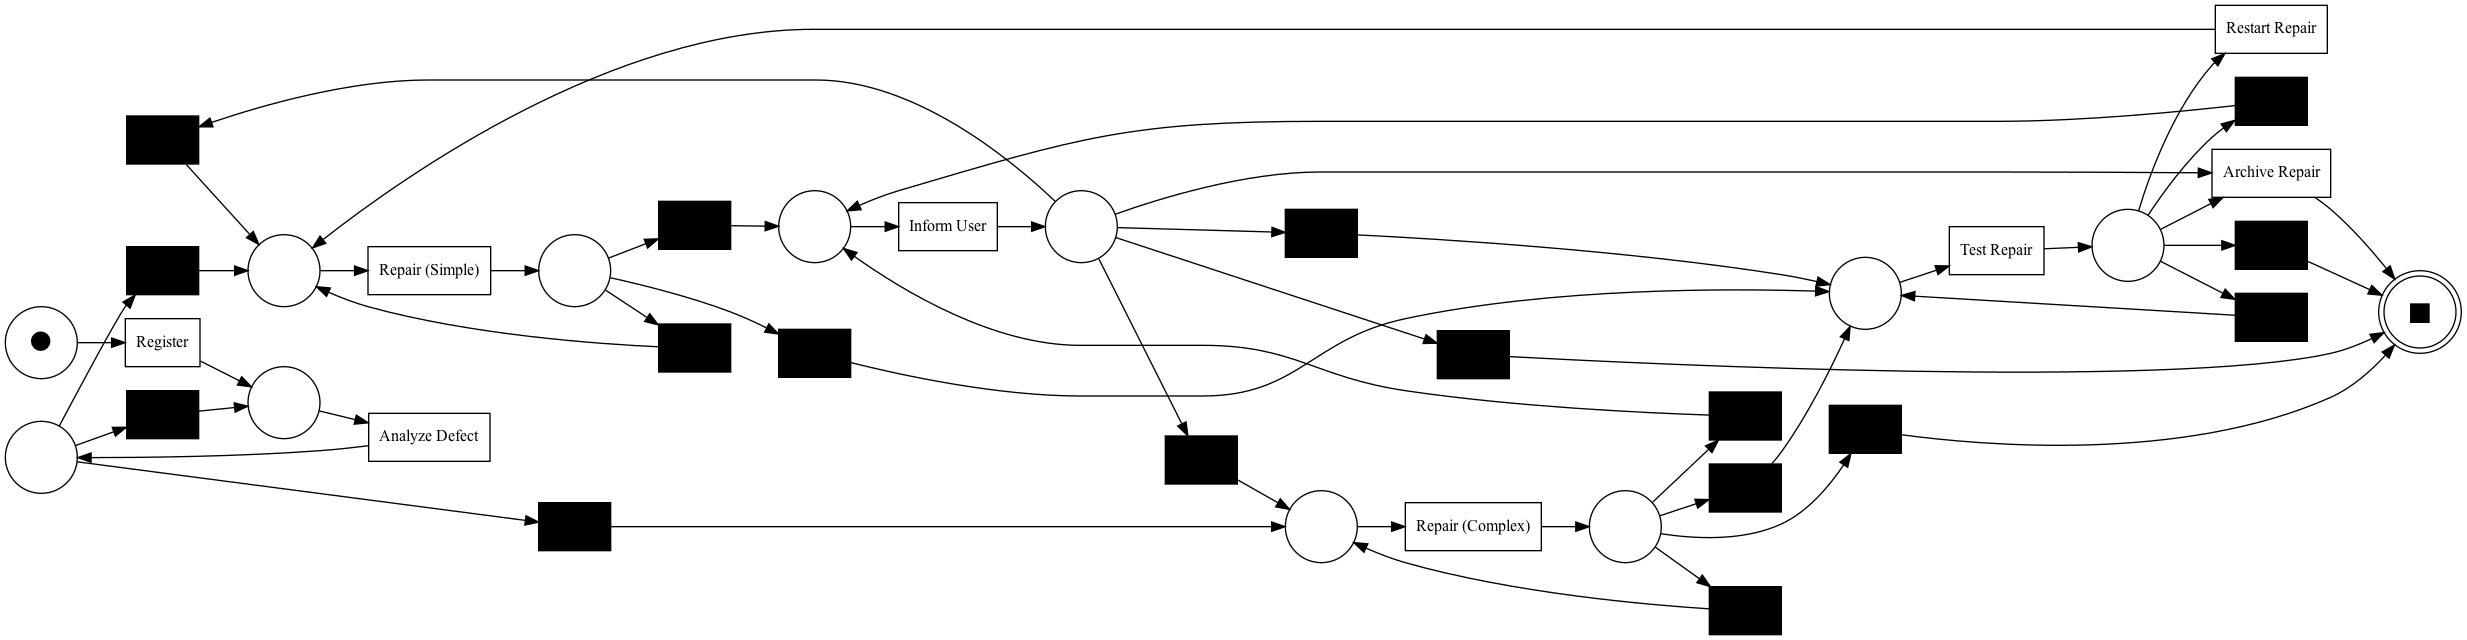

replaying log with TBR, completed variants :: 100%|██████████| 206/206 [00:00<00:00, 418.88it/s]

Fitness of Petrinet is:  96.26682102842608 %
Precision of Petrinet is:  52.58348451253107 %
Simplicity of Petrinet is:  56.923076923076934 %


In [203]:

net, im, fm = heuristics_miner.apply(sub_log1_AG, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log1_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

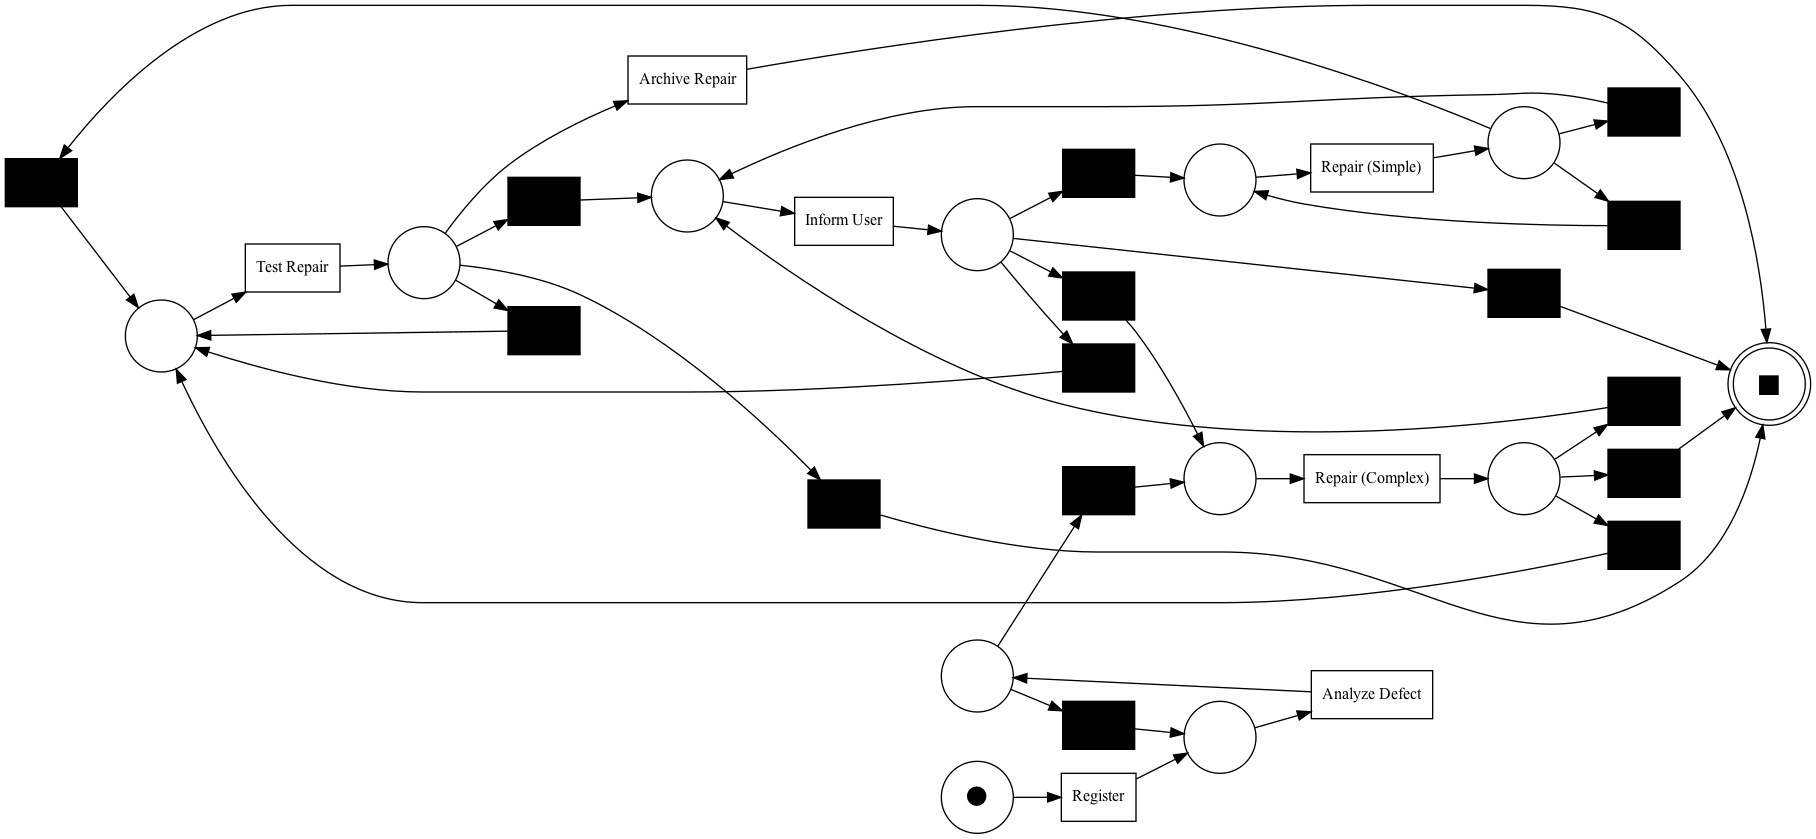

replaying log with TBR, completed variants :: 100%|██████████| 173/173 [00:00<00:00, 1173.85it/s]

Fitness of Petrinet is:  93.47596407818278 %
Precision of Petrinet is:  55.58646267964767 %
Simplicity of Petrinet is:  62.962962962962955 %


In [204]:

net, im, fm = heuristics_miner.apply(sub_log2_AG, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log2_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log3

## Log Fitness and Precision of Sub Event log 3

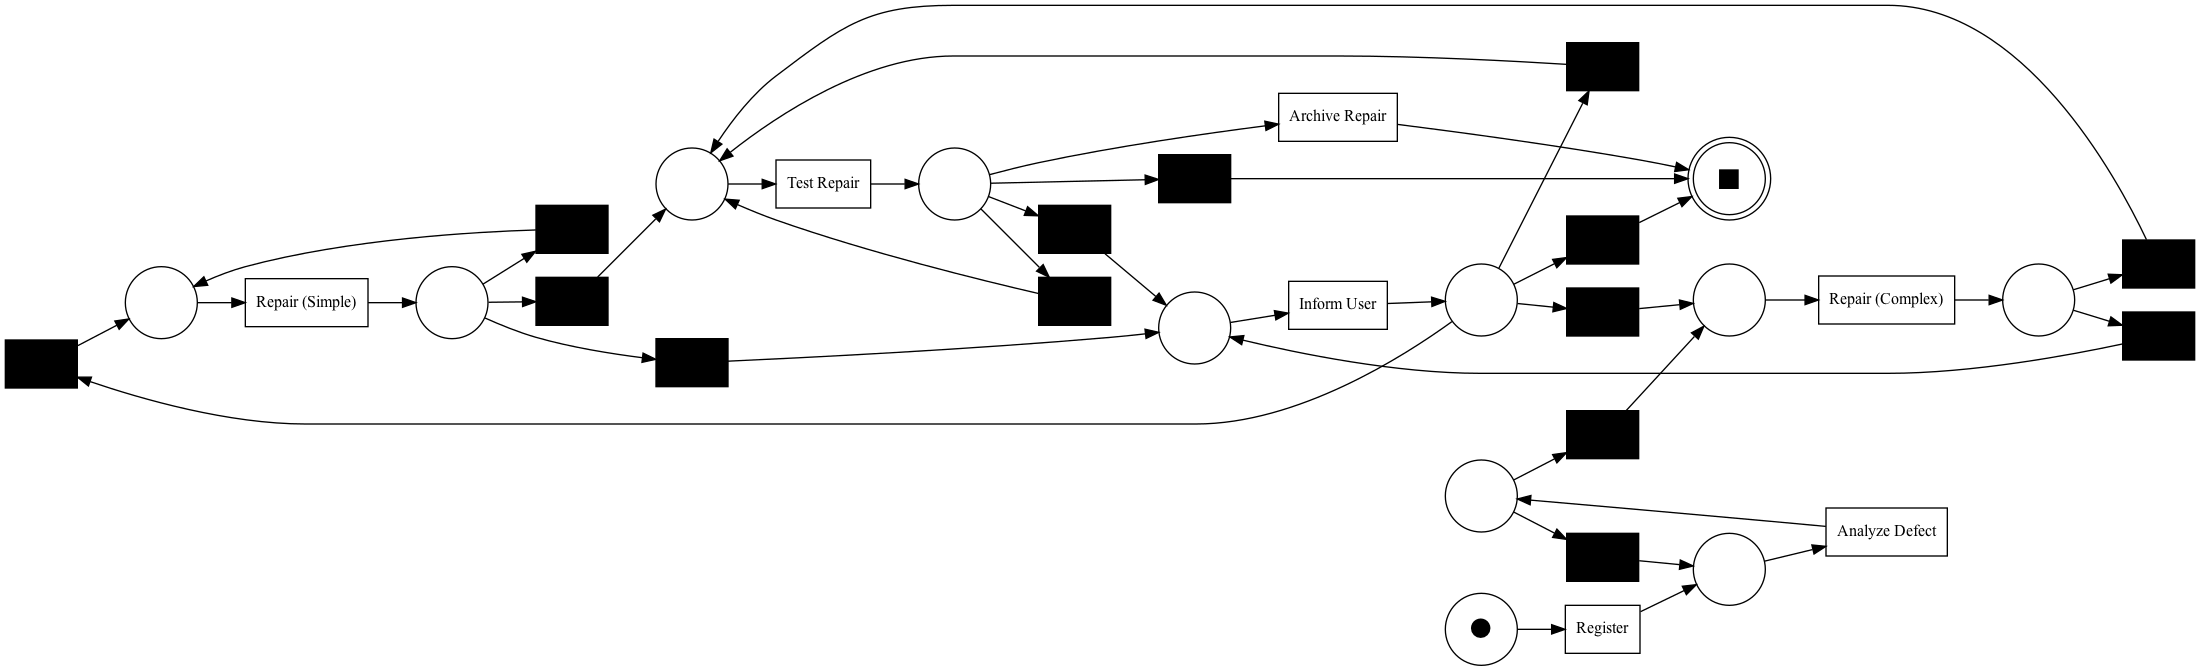

replaying log with TBR, completed variants :: 100%|██████████| 141/141 [00:00<00:00, 1163.40it/s]

Fitness of Petrinet is:  93.80261927034613 %
Precision of Petrinet is:  56.39709028669234 %
Simplicity of Petrinet is:  64.70588235294117 %


In [205]:

net, im, fm = heuristics_miner.apply(sub_log3_AG, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(sub_log3_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

# Self Organizing Maps - SOM


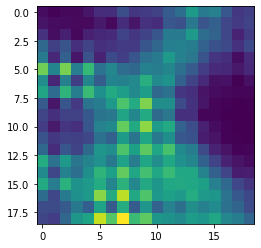

In [221]:
import susi
import numpy as np
import matplotlib.pyplot as plt
som = susi.SOMClustering()
som.fit(np_vectors)
umat = som.get_u_matrix()
clusters = som.get_bmus(np_vectors)
#print(clusters)
plt.imshow(np.squeeze(umat))

### Unique Clusters

In [222]:
unique_clusters = np.unique(clusters, axis=0)
unique_clusters

array([[0, 1],
       [0, 5],
       [0, 9],
       [5, 0],
       [5, 1],
       [5, 9],
       [6, 4],
       [9, 0],
       [9, 3],
       [9, 5],
       [9, 6]])

In [220]:
unique_clusters[0][0],unique_clusters[0][1]
unique_clusters[i][0] , unique_clusters[i][1]


(0, 5)

## Making Sub Event Logs on the basis of SOM Clusters

In [224]:

som_sub_log1 = EventLog()
som_sub_log2 = EventLog()
som_sub_log3 = EventLog()
som_sub_log4 = EventLog()
som_sub_log5 = EventLog()
som_sub_log6 = EventLog()
som_sub_log7 = EventLog()
som_sub_log8 = EventLog()
som_sub_log9 = EventLog()
som_sub_log10 = EventLog()
som_sub_log11 = EventLog()


for i in range(len(clusters)):
    if clusters[i][0] == unique_clusters[0][0] and clusters[i][1] ==unique_clusters[0][1]:
        som_sub_log1.append(log[i])
    
    elif clusters[i][0] == unique_clusters[1][0] and clusters[i][1] ==unique_clusters[1][1]:
        som_sub_log2.append(log[i])

    elif clusters[i][0] == unique_clusters[2][0] and clusters[i][1] ==unique_clusters[2][1]:
        som_sub_log3.append(log[i])
        
    elif clusters[i][0] == unique_clusters[3][0] and clusters[i][1] ==unique_clusters[3][1]:
        som_sub_log4.append(log[i])

    elif clusters[i][0] == unique_clusters[4][0] and clusters[i][1] ==unique_clusters[4][1]:
        som_sub_log5.append(log[i])

    elif clusters[i][0] == unique_clusters[5][0] and clusters[i][1] ==unique_clusters[5][1]:
        som_sub_log6.append(log[i])

    elif clusters[i][0] == unique_clusters[6][0] and clusters[i][1] ==unique_clusters[6][1]:
        som_sub_log7.append(log[i])

    elif clusters[i][0] == unique_clusters[7][0] and clusters[i][1] ==unique_clusters[7][1]:
        som_sub_log8.append(log[i])

    elif clusters[i][0] == unique_clusters[8][0] and clusters[i][1] ==unique_clusters[8][1]:
        som_sub_log9.append(log[i])
        
    elif clusters[i][0] == unique_clusters[9][0] and clusters[i][1] ==unique_clusters[9][1]:
        som_sub_log10.append(log[i])

    elif clusters[i][0] == unique_clusters[10][0] and clusters[i][1] ==unique_clusters[10][1]:
        som_sub_log11.append(log[i])

   


### Checking sizes of clusters

In [225]:
len(som_sub_log1),len(som_sub_log2),len(som_sub_log3),len(som_sub_log4),len(som_sub_log5),len(som_sub_log6)

(211, 31, 45, 14, 101, 524)

In [226]:
len(som_sub_log7),len(som_sub_log8),len(som_sub_log9),len(som_sub_log10),len(som_sub_log11)

(29, 88, 10, 13, 38)

# Petrinets from Alpha miner on Sub Event Logs generated from SOM

## Petrinets from Alpha miner on Sub Event Log1

## Log Fitness and Precision of SubLog1

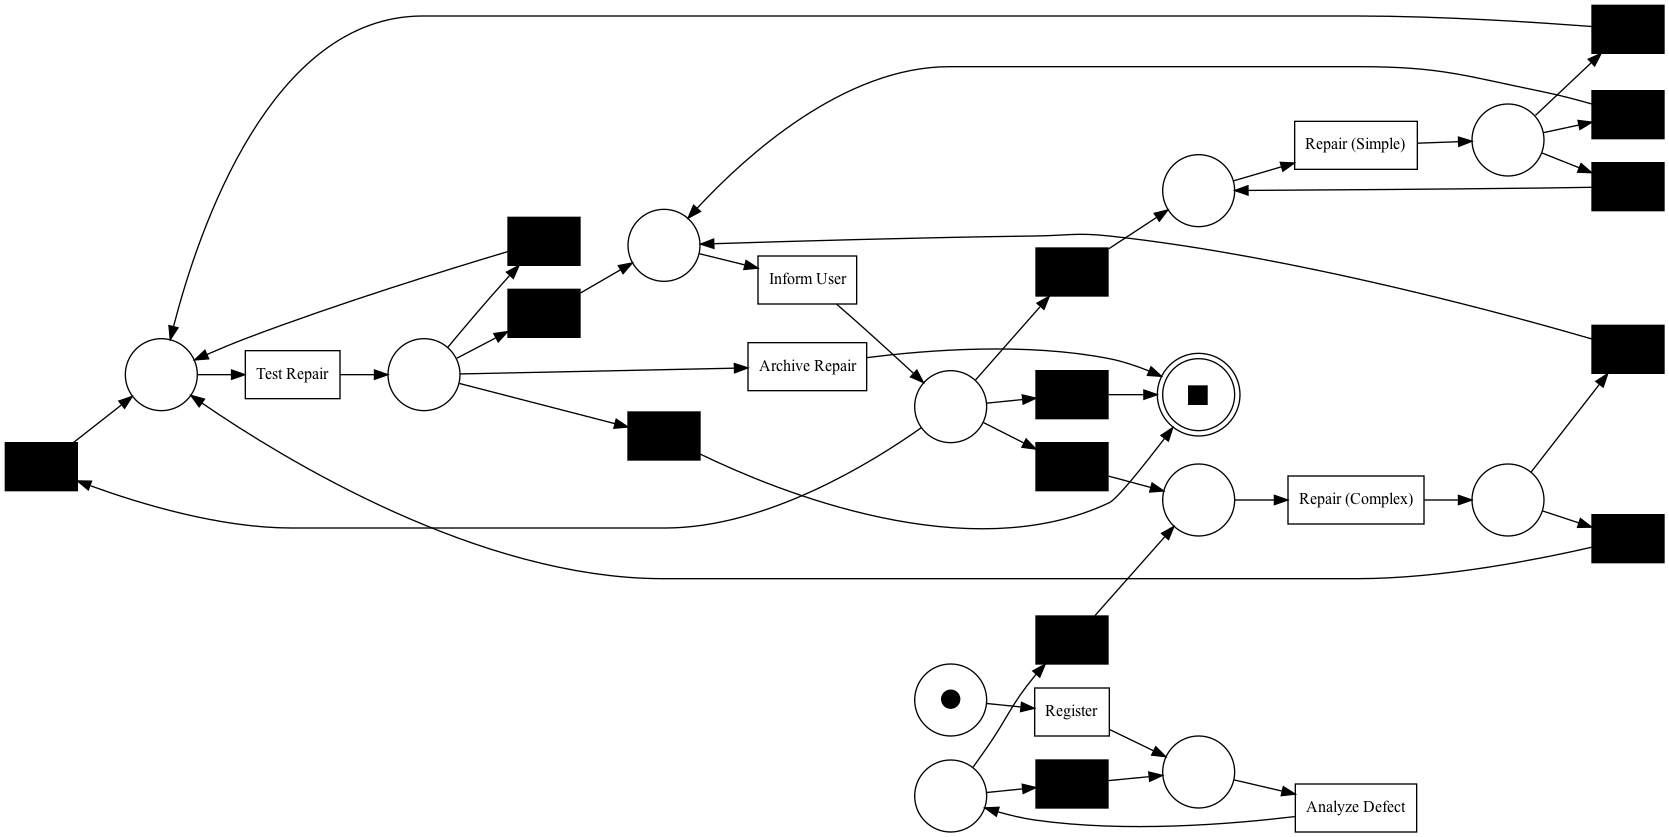

replaying log with TBR, completed variants :: 100%|██████████| 137/137 [00:00<00:00, 1021.98it/s]

Fitness of Petrinet is:  93.86552370747388 %
Precision of Petrinet is:  56.304985337243394 %
Simplicity of Petrinet is:  64.70588235294117 %


In [227]:

net, im, fm = heuristics_miner.apply(som_sub_log1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log2

## Log Fitness and Precision of SubLog2

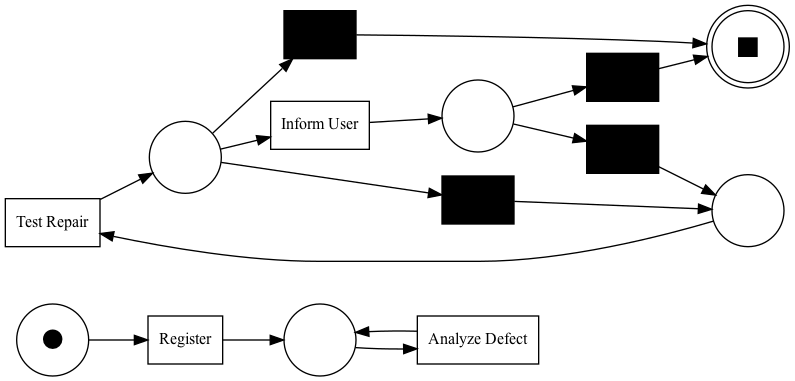

replaying log with TBR, completed variants :: 100%|██████████| 117/117 [00:00<00:00, 1036.58it/s]

Fitness of Petrinet is:  90.66543438077635 %
Precision of Petrinet is:  54.891304347826086 %
Simplicity of Petrinet is:  77.77777777777779 %


In [229]:

net, im, fm = heuristics_miner.apply(som_sub_log5, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log5, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log5, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log3

## Log Fitness and Precision of Sub Event log 3

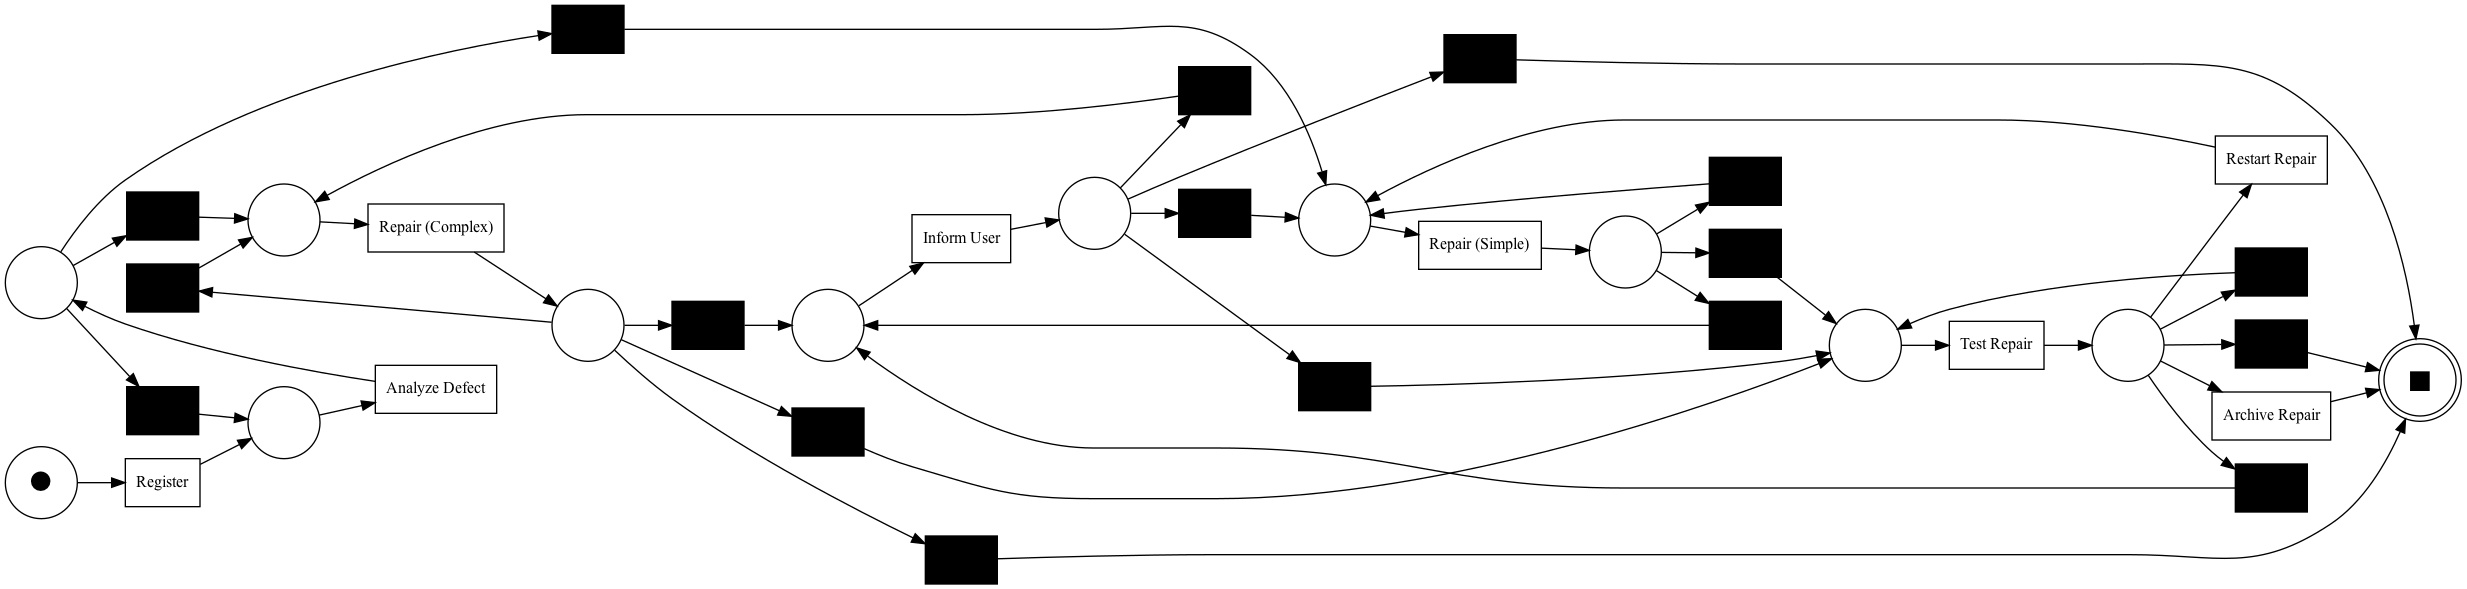

replaying log with TBR, completed variants :: 100%|██████████| 183/183 [00:00<00:00, 208.44it/s]

Fitness of Petrinet is:  97.7113213304852 %
Precision of Petrinet is:  50.8244861079738 %
Simplicity of Petrinet is:  58.730158730158735 %


In [230]:

net, im, fm = heuristics_miner.apply(som_sub_log6, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log6, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log6, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log 4

## Log Fitness and Precision of SubLog 4

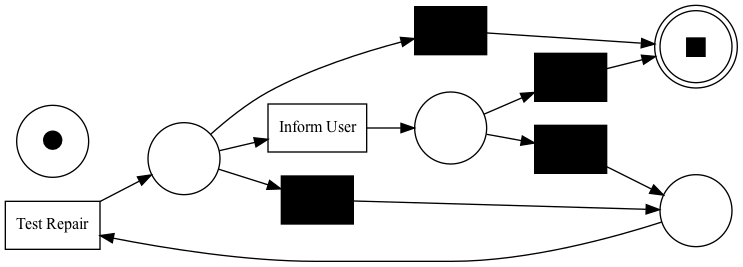

replaying log with TBR, completed variants :: 100%|██████████| 100/100 [00:00<00:00, 591.72it/s]


Fitness of Petrinet is:  87.86206896551724 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  84.61538461538463 %


In [231]:

net, im, fm = heuristics_miner.apply(som_sub_log8, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log8, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log11, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log 5

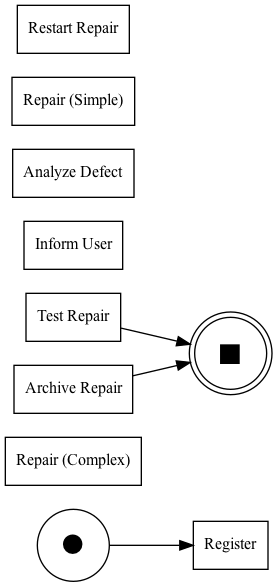

replaying log with TBR, completed variants :: 100%|██████████| 37/37 [00:00<00:00, 851.16it/s]

Fitness of Petrinet is:  73.25581395348837 %
Precision of Petrinet is:  19.20341394025604 %
Simplicity of Petrinet is:  100.0 %


In [232]:

net, im, fm = heuristics_miner.apply(som_sub_log9, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log9, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log9, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Log Fitness and Precision of SubLog 5

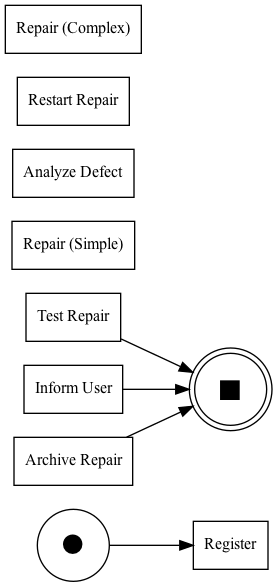

replaying log with TBR, completed variants :: 100%|██████████| 69/69 [00:00<00:00, 613.69it/s]

Fitness of Petrinet is:  66.88311688311688 %
Precision of Petrinet is:  18.532455315145814 %
Simplicity of Petrinet is:  100.0 %


In [233]:

net, im, fm = heuristics_miner.apply(som_sub_log10, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log10, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log10, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

## Petrinets from Alpha miner on Sub Event Log 6

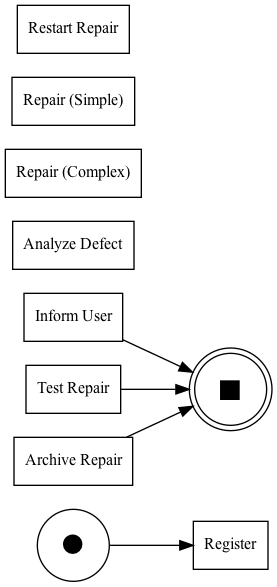

replaying log with TBR, completed variants :: 100%|██████████| 100/100 [00:00<00:00, 393.50it/s]

Fitness of Petrinet is:  66.88888888888889 %
Precision of Petrinet is:  19.148244473342004 %
Simplicity of Petrinet is:  100.0 %


In [234]:

net, im, fm = heuristics_miner.apply(som_sub_log11, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm) 
pn_visualizer.view(gviz)
fitness = replay_fitness_evaluator.apply(som_sub_log11, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log11, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')